In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [3]:
fashion_mnist= keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()
#normalize the images
train_images= train_images / 255.0
test_images= test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 40s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 12s 3us/step


In [4]:
#define the model
model= keras.Sequential([keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Flatten(),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')])
import warnings

In [9]:
# Compile the model with the correct loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
#train the model
model.fit(train_images, train_labels, epochs=10)
#evaluate the model
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('Test accuracy', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8241 - loss: 0.5051
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9054 - loss: 0.2589
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9237 - loss: 0.2059
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9338 - loss: 0.1734
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9467 - loss: 0.1441
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9549 - loss: 0.1226
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9637 - loss: 0.1011
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9707 - loss: 0.0800
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9764 - loss: 0.0662
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9804 - loss: 0.0547
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9179 - loss: 0.3547
Test accuracy 0.91829997

In [12]:
#make predictions
predictions= model.predict(test_images)
predicted_labels= np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


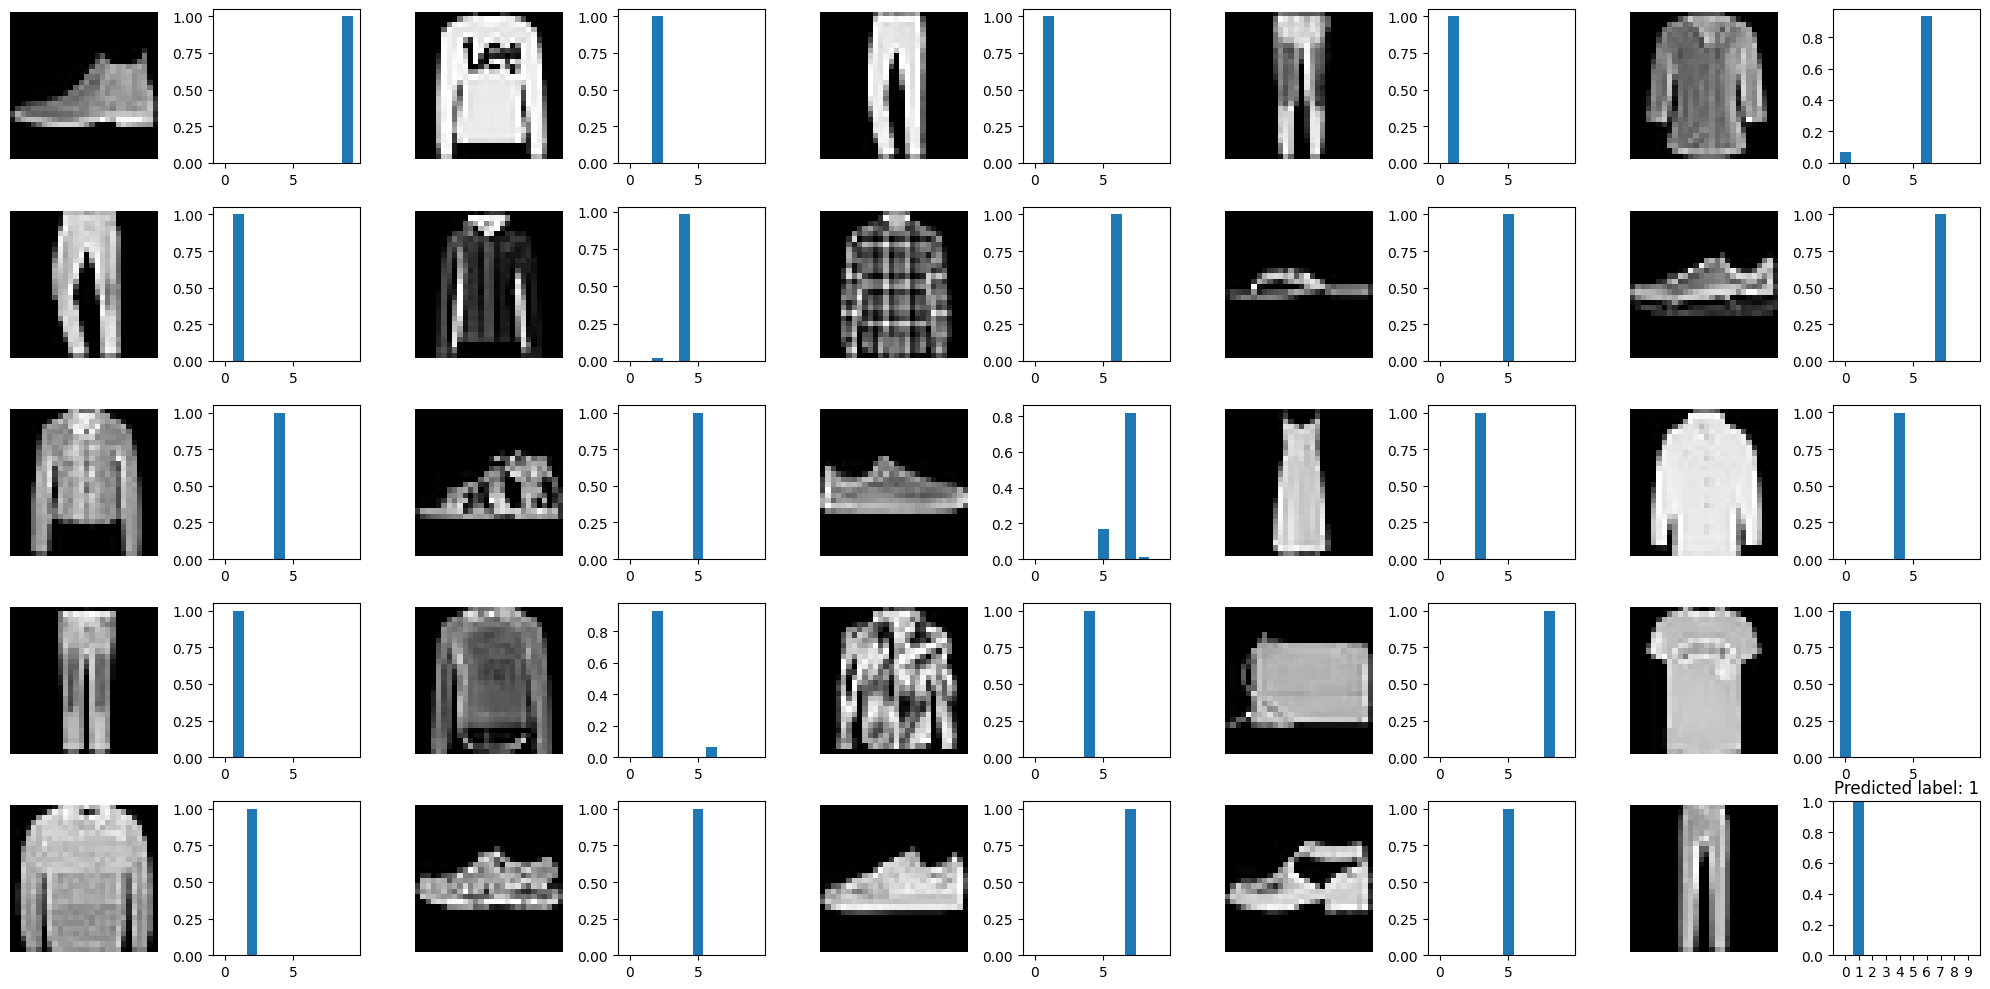

In [18]:
num_rows=5
num_cols=5
num_images= num_rows * num_cols
plt.figure(figsize=(2 * 2 *num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2* num_cols, 2 * i + 1)
    plt.imshow(test_images[i],cmap='gray')
    plt.axis('off')
    plt.subplot(num_rows, 2 * num_cols, 2* i + 2)
    plt.bar(range(10),
predictions[i])
plt.xticks(range(10))
plt.ylim([0, 1])
plt.tight_layout()
plt.title(f"Predicted label: {predicted_labels[i]}")
plt.show()